In [17]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

### Function veh_aqi_merge(year)
Function that merges the vehicle data with Air Quality Index(AQI) data

**Inputs**  
year : year to retrieve AQI data

**Output**  
merged dataframe of vehicle data and AQI data 


In [18]:
def veh_aqi_merge(year):
    
    # import the vehicle data
    vehicle_df = pd.read_csv("Data/vehicle_data.csv.gz", compression="gzip")
    
    # create a dataframe for all vehicles up to given year
    vehicle_year_df = vehicle_df.loc[vehicle_df['model_year'].astype(int) <= year]

    # find the age of cars
    veh_age = year - vehicle_year_df['model_year'].astype(int)

    # create a new dataframe with an vehicle age column
    new_vehicle_df = pd.DataFrame(vehicle_year_df)
    new_vehicle_df['vehicle_age'] = veh_age
    
    # import the AQI index for zipcodes in NY State for given year
    aqi_df_all = pd.read_csv("Data/AQIndex.csv", index_col=0)
    
    # group the data by year
    aqi_group = aqi_df_all.groupby('Year')
    
    # retrieve the group for given year
    aqi_df = aqi_group.get_group(year)

    # merge the 2 dataframes on zipcode to get one dataframe 
    vehicle_aqi_df = pd.merge(aqi_df, new_vehicle_df, on=['zip','zip'], how="left" )
    
    # remove any rows with no values
    vehicle_aqi_df = vehicle_aqi_df.dropna()

    # returns merged dataframe
    return (vehicle_aqi_df)

### Function veh_age_aqi(dataframe)
Function that finds the average AQI based on age of vehicle

**Inputs**  
dataframe : Merged dataframe of vehicle data and AQI data

**Output**  
Dataframe consisting of vehicle age and AQI

In [19]:
def veh_age_aqi(vehicle_aqi_df):    
    # group data by vehicle age and find mean of AQI
    veh_age_df = vehicle_aqi_df.groupby('vehicle_age').agg({'AQI':'mean'})
    veh_age_df = veh_age_df.reset_index()
    
    # return a dataframe with vehicle age and AQI
    return (veh_age_df)


### Function scatter_plot(x_values, y_values, title, x_label, y_label, file_name)
Function that plots a scatter plot

**Inputs**  
x_values: x values for the graph  
y_values: y values for the graph  
title: title of the graph  
x_label: x axis label  
y_label: y axis label  
file_name: file name and path to store graph

In [20]:
def scatter_plot(x_values, y_values, title, x_label, y_label, file_name):
    # Plot the scatter plot for given year
    plt.figure(figsize=(8,6))
    plt.scatter(x_values, y_values)

    # Plot the linear regression model
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (min(x_values)+10, min(y_values)+10),fontsize=15,color="red")

    # Set the title and axis labels   
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Calculate the correlation coefficient
    print(f"The r-squared is: {rvalue**2}")
    
    # save to file
    plt.savefig(file_name, bbox_inches="tight", pad_inches=.3)

    plt.show()


### Function box_plot(y_values, title, y_label, file_name)
Function that plots a box plot

**Inputs**   
y_values: y values for the graph  
title: title of the graph  
y_label: y axis label  
file_name: file name and path to store graph

In [21]:
def box_plot(y_values, title, y_label, file_name):
    # Calculate quartiles, IQR, and identify potential outliers for given year
    quartiles = y_values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile is: {lowerq}")
    print(f"The upper quartile is: {upperq}")
    print(f"The interquartile range of is: {iqr}")
    print(f"The the mean of is: {quartiles[0.5]} ")

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

    fig1, ax1 = plt.subplots()
    ax1.set_title(title)
    ax1.set_ylabel(y_label)
    ax1.boxplot(y_values)
    
    # save to file
    plt.savefig(file_name, bbox_inches="tight", pad_inches=.3)
    
    plt.show()
    

### Function bar_chart(x_values, y_values, title, x_label, y_label, file_name)
Function that plots a bar chart

**Inputs**  
x_values: x values for the graph  
y_values: y values for the graph  
title: title of the graph  
x_label: x axis label  
y_label: y axis label  
file_name: file name and path to store graph

In [22]:
def bar_chart(x_values, y_values, title, x_label, y_label, file_name):

    # Set x axis
    x_num = np.arange(len(x_values))

    # Create the bar graph and set figure size to adjust for space
    plt.figure(figsize=(15,6))
    plt.bar(x_num, y_values, color="b", align="center", width=.5)

    # Create a list indicating where to write x labels
    tick_locations = [value for value in x_num]
    plt.xticks(tick_locations, x_values, rotation="vertical")

    # Set x and y limits
    plt.xlim(-.75, len(x_num)-0.25)
    plt.ylim(0, y_values.max()+20)

    # Set a Title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # save to file
    plt.savefig(file_name, bbox_inches="tight", pad_inches=.3)
    
    plt.show()


### Function mult_box_plot(y_values, x_list , title, y_label, file_name)
Function that plots a multi box plot

**Inputs**  
y_values: y values for the graph  
x_list: list of labels for the box plots  
title: title of the graph  
y_label: y axis label  
file_name: file name and path to store graph

In [23]:
def mult_box_plot(y_values, x_list , title, y_label, file_name):
 
    fig1, ax1 = plt.subplots()
    ax1.set_title(title)
    ax1.set_ylabel(y_label)
    flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='b')
    bp = ax1.boxplot(y_values)

    ax1.set_xticklabels(x_list)

    # save to file
    plt.savefig(file_name, bbox_inches="tight", pad_inches=.3)

    plt.show()


## Data Anaylsis

---------------
YEAR: 2009
---------------
Scatter Plot of air quality for age of vehicle for 2009
----------------------------------------------------------
The r-squared is: 0.44811961222406105


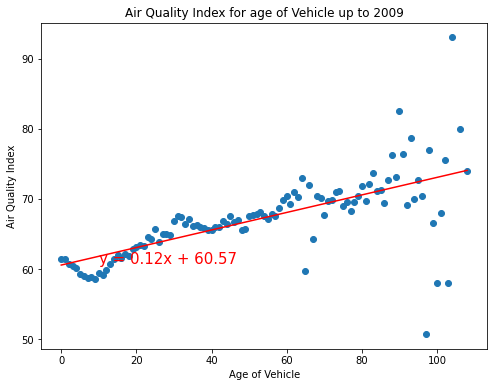

Box Plot of air quality index for 2009
------------------------------------------
The lower quartile is: 63.692888801734554
The upper quartile is: 70.20234315948602
The interquartile range of is: 6.509454357751466
The the mean of is: 67.19329388560158 
Values below 53.928707265107356 could be outliers.
Values above 79.96652469611323 could be outliers.


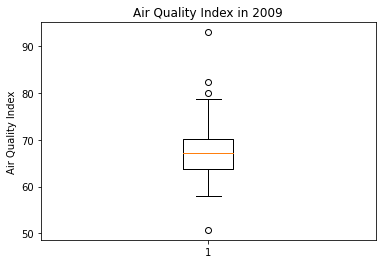

Bar chart of air quality index for different vehicle body types for 2009
---------------------------------------------------------------------------


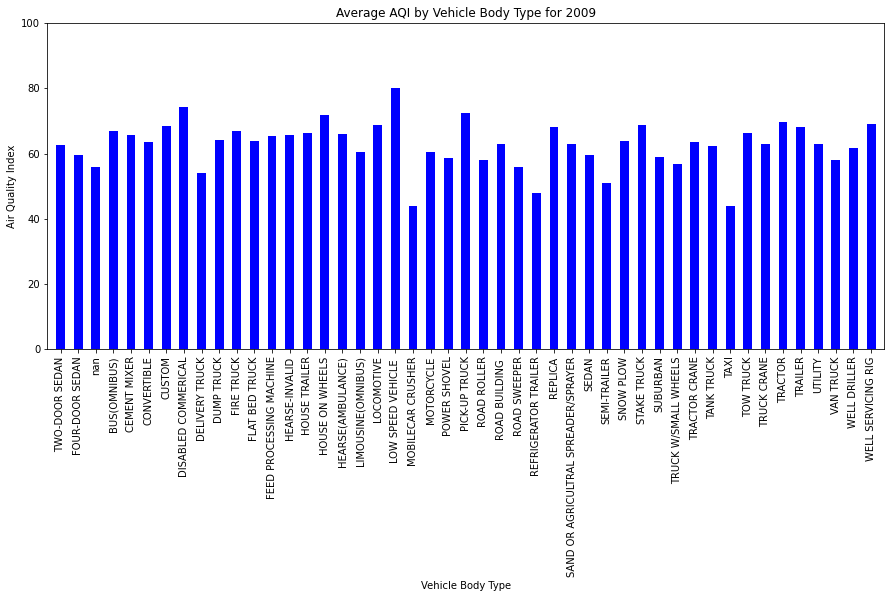

Multi Box Plot to compare private and commercial vehicles vs AQI for 2009
---------------------------------------------------------------------------


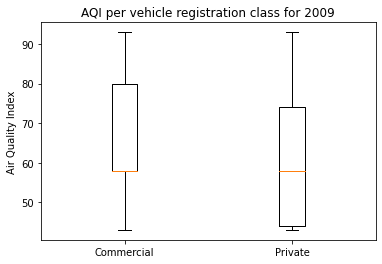

---------------
YEAR: 2015
---------------
Scatter Plot of air quality for age of vehicle for 2015
----------------------------------------------------------
The r-squared is: 0.06117003935198434


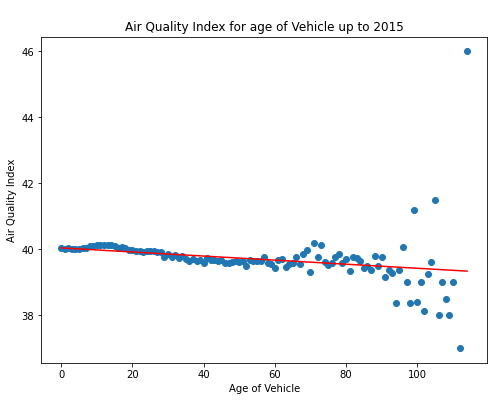

Box Plot of air quality index for 2015
------------------------------------------
The lower quartile is: 39.552562988705475
The upper quartile is: 39.953849534832614
The interquartile range of is: 0.4012865461271389
The the mean of is: 39.694063926940636 
Values below 38.95063316951477 could be outliers.
Values above 40.55577935402332 could be outliers.


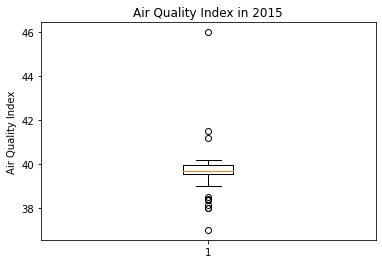

Bar chart of air quality index for different vehicle body types for 2015
---------------------------------------------------------------------------


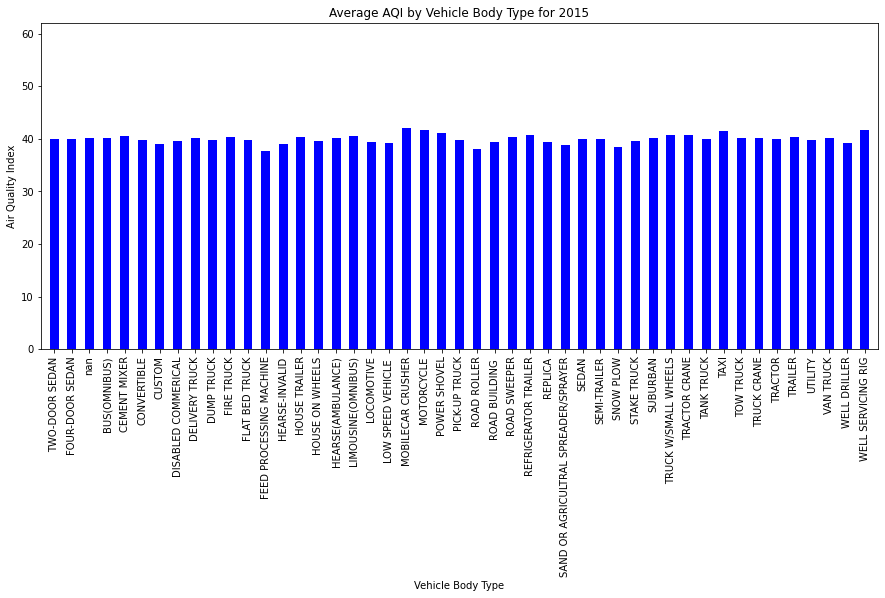

Multi Box Plot to compare private and commercial vehicles vs AQI for 2015
---------------------------------------------------------------------------


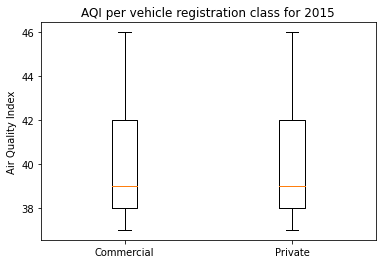

---------------
YEAR: 2020
---------------
Scatter Plot of air quality for age of vehicle for 2020
----------------------------------------------------------
The r-squared is: 0.7560052918089275


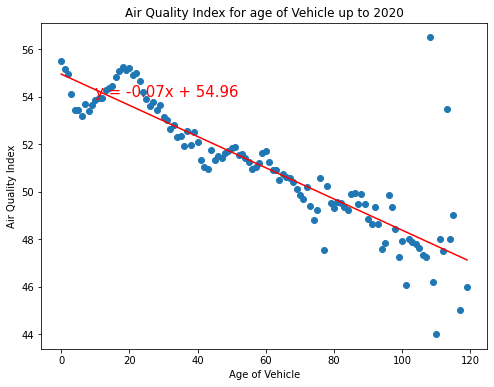

Box Plot of air quality index for 2020
------------------------------------------
The lower quartile is: 49.34977100984658
The upper quartile is: 53.4175047504079
The interquartile range of is: 4.067733740561323
The the mean of is: 51.23375337093313 
Values below 43.24817039900459 could be outliers.
Values above 59.519105361249885 could be outliers.


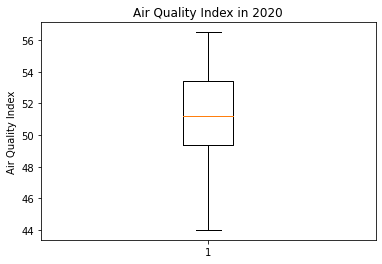

Bar chart of air quality index for different vehicle body types for 2020
---------------------------------------------------------------------------


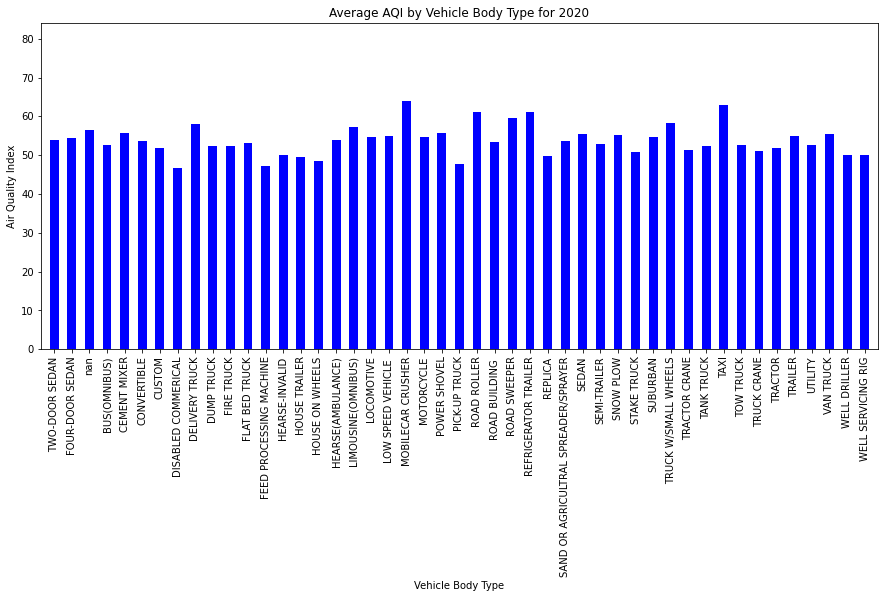

Multi Box Plot to compare private and commercial vehicles vs AQI for 2020
---------------------------------------------------------------------------


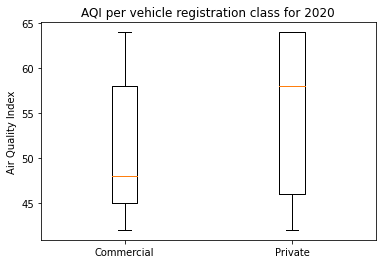

In [24]:
# List of years that AQI data is available
years = [2009, 2015, 2020]

# looping through the years
for year in years:
    
    print("---------------")
    print(f"YEAR: {year}")
    print("---------------")
    # for given year merge vehicle data and AQI data
    veh_complete_df = veh_aqi_merge(year)
    
    # find the average AQI for age of vehicle
    veh_age_df = veh_age_aqi(veh_complete_df)
    
    # plot scatter plot of air quality for age of vehicle
    print(f"Scatter Plot of air quality for age of vehicle for {year}")
    print("----------------------------------------------------------")
    
    # set x-values as age of vehile and y-values are AQI
    x_values = veh_age_df['vehicle_age']
    y_values = veh_age_df['AQI']

    # give a title, x-label and y-label
    title = f"Air Quality Index for age of Vehicle up to {year}"
    x_label = "Age of Vehicle"
    y_label = "Air Quality Index"

    # filename to store the .png file
    file_name = f"Images/AQI_veh_age_scatter_{year}.png"

    # call function to draw scatter plot
    scatter_plot(x_values, y_values, title, x_label, y_label, file_name)
    
    # plot box plot for air quality index for given year
    print(f"Box Plot of air quality index for {year}")
    print("------------------------------------------")
    
    # give AQI for y_values
    y_values = veh_age_df['AQI']

    # set the title and label for y-axis
    title = f'Air Quality Index in {year}'
    y_label = "Air Quality Index"

    # filename to store the .png file
    file_name = f"Images/AQI_veh_age_box_{year}.png"

    # call function to draw box plot
    box_plot(y_values, title, y_label, file_name)
    
    # plot a bar chart of air quality index for different vehicle body types
    print(f"Bar chart of air quality index for different vehicle body types for {year}")
    print("---------------------------------------------------------------------------")
    
    # group the merged vehicle dataframe by body type and find the average AQI
    veh_body_type_df = veh_complete_df.groupby("body_type").agg({"AQI":"mean"})

    # find the vehicle body types
    veh_body_type_df = veh_body_type_df.reset_index()

    # remove any extra trailing spaces
    veh_body_type_df['body_type'] = veh_body_type_df['body_type'].str.rstrip()

    # get the body type description
    ny_veh_body_type_df = pd.read_csv("Data/ny_veh_body_type.csv")
    veh_body_type_df['Body Description'] = veh_body_type_df.set_index(veh_body_type_df['body_type']).index.map(ny_veh_body_type_df.set_index(ny_veh_body_type_df['body_type'])['body_description'])
    
    # set vehicle body type as x values and AQI as y values
    x_values = veh_body_type_df['Body Description']
    y_values = veh_age_df['AQI']

    # set title, label for x and y axis
    title = f"Average AQI by Vehicle Body Type for {year}"
    x_label = "Vehicle Body Type"
    y_label = "Air Quality Index"

    # filename to store the .png file
    file_name = f"Images/AQI_veh_body_type_bar_{year}.png"

    # call function to draw bar chart
    bar_chart(veh_body_type_df['Body Description'], veh_body_type_df['AQI'], title, x_label, y_label, file_name)
    
    # plot a multi box plot to compare private and commercial vehicles vs AQI
    print(f"Multi Box Plot to compare private and commercial vehicles vs AQI for {year}")
    print("---------------------------------------------------------------------------")
    
    # group the data by registration class
    veh_class_group = veh_complete_df.groupby("registration_class")

    # make a list of vehicle class
    veh_classes = ['Commercial', 'Private']

    veh_class_AQI = []

    # get the commercial, passenger and private vanity group data
    com_df = veh_class_group.get_group('COM')
    pas_df = veh_class_group.get_group('PAS')
    srf_df = veh_class_group.get_group('SRF')

    # combine pasenger and private vanity data
    pvt_df = pd.concat([pas_df, srf_df])

    # append to the list the AQI for each vehicle in class
    veh_class_AQI.append(com_df['AQI'])
    veh_class_AQI.append(pvt_df['AQI'])

    # set title and label for y axis
    title = f'AQI per vehicle registration class for {year}'
    y_label = 'Air Quality Index'

    # filename to store the .png file
    file_name = f"Images/reg_class_aqi_{year}.png"

    # call function to draw multi box plot
    mult_box_plot(veh_class_AQI, veh_classes, title, y_label, file_name)
    
    

## Observations
### Air Quality Index comparison between 2009, 2015 and 2020
The Air Quality Index in 2009 had a median of 68 with a few outliers.  
2015 was a strange year, with a median Air Quality Index of 39 which is a significant drop. However, this year had many outliers.  
In 2020, the median Air Quality Index was around 50 which is an increase from the anomaly year 2015 and decrease from 2019. Overall, the Air Quality has improved from 2009 to 2020.

![aqi_2009](Images/AQI_veh_age_box_2009.png)
![aqi_2015](Images/AQI_veh_age_box_2015.png)
![aqi_2020](Images/AQI_veh_age_box_2020.png)

### Scatter plot between 2009, 2015 and 2020
Here we are comparing the Air Quality Index based on the age of the cars by zipcode.  
In 2009, the scatter plot shows that the Air Quality was better in areas with newer cars than with older cars.  
In 2015, the scatter plot does not show much difference in the air quality index. Though, there was a wide range of Air Quality Index values for older cars.  
In 2020, the Air Quality Index dropped for areas that have older cars. This maybe because they are not in use as much or these cars are slowly being phased out.

![sp_2009](Images/AQI_veh_age_scatter_2009.png)
![sp_2015](Images/AQI_veh_age_scatter_2015.png)
![sp_2020](Images/AQI_veh_age_scatter_2020.png)

### Bar chart between 2009, 2015 and 2020
Checking if the body type of cars affects air quality. There does not seem to be any difference in the type of car and the Air Quality.

![sp_2009](Images/AQI_veh_body_type_bar_2009.png)
![sp_2015](Images/AQI_veh_body_type_bar_2015.png)
![sp_2020](Images/AQI_veh_body_type_bar_2020.png)

### Multi Box Plot between 2009, 2015 and 2020
Is there a difference between the air quality in areas with commercial cars vs private cars?  
In 2009, areas with more commercial vehicles had a higher Air Quality Index which means poorer air quality.  
In 2015, the air quality between commercial and private vehicles was almost the same.  
In 2020, the air quality in areas with private vehicles was more than those with commercial vehicles.

![sp_2009](Images/reg_class_aqi_2009.png)
![sp_2015](Images/reg_class_aqi_2015.png)
![sp_2020](Images/reg_class_aqi_2020.png)
